## Erschließungsstrategien für unbekannten Wortschatz von DaF-Lernenden an spanischen Universitäten (2017-19)
# Datenanalyse (2)

##### Werkzeuge und Daten importieren

In [1]:
from funktionen import *
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import math
from scipy import stats
from sklearn import tree
import seaborn as sns
sns.set(style="whitegrid") #"white", "darkgrid"...
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Daten = pd.read_pickle('D:\Daten\DISS\Daten\Estrategias_Estudiantes_2017-19_ber')

In [3]:
Daten = pd.read_pickle('D:\Daten\DISS\Daten\Estrategias_Estudiantes_Analyse')

In [4]:
#Daten.head(3)

In [5]:
Daten['V_E_autonom'].value_counts()

1    219
2    171
Name: V_E_autonom, dtype: int64

In [6]:
gloss = pd.read_pickle('D:\Daten\DISS\Daten\Gloss2018')

##### Untergruppen und Listen für die Analyse

In [7]:
Liste_A_Q2 = [col for col in Daten.columns if 'A-Q2' in col]

In [8]:
Liste_A_Q3 = [col for col in Daten.columns if 'A-Q3' in col]

In [9]:
Liste_A_Q3.pop(3)

'A-Q3_3_TEXT'

In [10]:
Liste_A_Q4 = [col for col in Daten.columns if 'A-Q4' in col]

In [11]:
Liste_C_Q1 = [col for col in Daten.columns if 'C-Q1' in col]

In [12]:
Liste_Var = [col for col in Daten.columns if 'V_' in col]

In [13]:
Liste_Var

['V_L1-Bi/Trilingualismus',
 'V_Studienrichtung',
 'V_Niveau_DK',
 'V_Alter',
 'V_Geschlecht',
 'V_Erstsprache_Span',
 'V_Spr_Zahl',
 'V_Spr_Fran',
 'V_Spr_Griech',
 'V_Spr_Latein',
 'V_Spr_Germ',
 'V_Spr_Rom',
 'V_Spr_Slaw',
 'V_Spr_Asiat',
 'V_E_Schule_LL',
 'V_E_Schule_Eng',
 'V_E_Schule_Spr',
 'V_E_Univ_DK',
 'V_E_Univ_andere',
 'V_E_Sprachschule',
 'V_E_DK_aktuell',
 'V_E_Sozial',
 'V_E_autonom',
 'V_Met_Erkl',
 'V_Met_Tipps',
 'V_Met_Training',
 'V_Met_Vgl',
 'V_Met_Reflexion',
 'V_Met_unbewusst']

In [14]:
#Liste_Var.pop(6)

##### Analyse...

In [15]:
#def get_good_str(df):
#    df_good = df[((df[strat['S1']] >= 3).sum(axis=1) >= 2) & ((df[strat['S2']] >= 3).sum(axis=1) >= 2) & ((df[strat['S3']] >= 3).sum(axis=1) >= 2) & ((df[strat['S4']] >= 3).sum(axis=1) >= 4) & ((df[strat['S5']] >= 3).sum(axis=1) >= 2) & ((df[strat['S6']] >= 3).sum(axis=1) >= 3)]
#    return df_good.shape[0], (df_good.shape[0])/(df.shape[0])*100

In [16]:
#Stud_U1 = Finished[(Finished['B-Q2-1_1'] == 1) | (Finished['B-Q2-2_1'] == 1) | (Finished['B-Q2-3_1'] == 1) | (Finished['B-Q2-4_1'] == 1) | (Finished['B-Q2-5_1'] == 1) | (Finished['B-Q2-6_1'] == 1) | (Finished['B-Q2-7_1'] == 1)]
#Stud_U2 = Finished[(Finished['B-Q2-1_2'] == 1) | (Finished['B-Q2-2_2'] == 1) | (Finished['B-Q2-3_2'] == 1) | (Finished['B-Q2-4_2'] == 1) | (Finished['B-Q2-5_2'] == 1) | (Finished['B-Q2-6_2'] == 1) | (Finished['B-Q2-7_2'] == 1)]
#Stud_U3 = Finished[(Finished['B-Q2-1_3'] == 1) | (Finished['B-Q2-2_3'] == 1) | (Finished['B-Q2-3_3'] == 1) | (Finished['B-Q2-4_3'] == 1) | (Finished['B-Q2-5_3'] == 1) | (Finished['B-Q2-6_3'] == 1) | (Finished['B-Q2-7_3'] == 1)]
#Stud_U4 = Finished[(Finished['B-Q2-1_4'] == 1) | (Finished['B-Q2-2_4'] == 1) | (Finished['B-Q2-3_4'] == 1) | (Finished['B-Q2-4_4'] == 1) | (Finished['B-Q2-5_4'] == 1) | (Finished['B-Q2-6_4'] == 1) | (Finished['B-Q2-7_4'] == 1)]
#Stud_U5 = Finished[(Finished['B-Q2-1_5'] == 1) | (Finished['B-Q2-2_5'] == 1) | (Finished['B-Q2-3_5'] == 1) | (Finished['B-Q2-4_5'] == 1) | (Finished['B-Q2-5_5'] == 1) | (Finished['B-Q2-6_5'] == 1) | (Finished['B-Q2-7_5'] == 1)]
#Stud_U6 = Finished[(Finished['B-Q2-1_6'] == 1) | (Finished['B-Q2-2_6'] == 1) | (Finished['B-Q2-3_6'] == 1) | (Finished['B-Q2-4_6'] == 1) | (Finished['B-Q2-5_6'] == 1) | (Finished['B-Q2-6_6'] == 1) | (Finished['B-Q2-7_6'] == 1)]

In [17]:
FA_weights = pd.read_excel('D:\Daten\DISS\Daten\FA_weights.xlsx')

In [18]:
A = FA_weights.drop(FA_weights.columns[0], axis=1).values
B = Daten[Liste_A_Q3].values
C = B.dot(A)
Df_C = pd.DataFrame(C, columns=FA_weights.columns[1:], index=Daten[Liste_A_Q3].index)

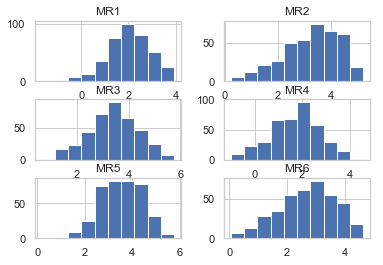

In [19]:
Df_C.hist();

In [20]:
Daten_total = pd.concat([Daten, Df_C], axis=1, join='outer', sort=False)

In [28]:
Liste_MR = ['MR1','MR2','MR3','MR4','MR5','MR6']

In [29]:
Liste_MR

['MR1', 'MR2', 'MR3', 'MR4', 'MR5', 'MR6']

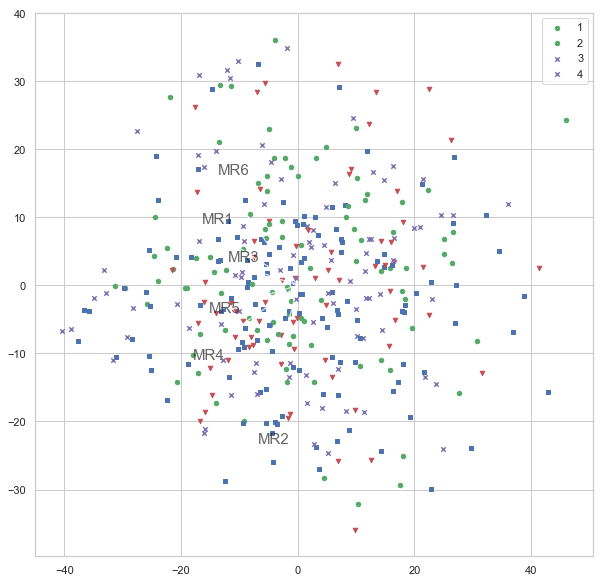

In [30]:
graf_biplot(Daten_total[Liste_MR],5,Daten_total['V_Studienrichtung'])

In [23]:
def graf_diff_box2(data,var,item):
    
    col1 = data[data[var]==1][item]
    col2 = data[data[var]==2][item]
    
    cols = [col1, col2]
    
    fig, ax = plt.subplots()
    ax.boxplot(cols)

    plt.show()

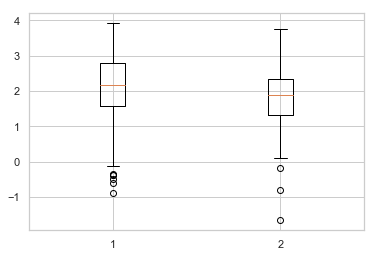

In [24]:
graf_diff_box2(Daten_total,'V_E_autonom','MR1')

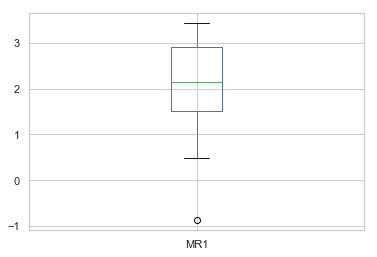

In [25]:
Daten_total[Daten_total['V_Niveau_DK']==5]['MR1'].plot(kind='box')

In [26]:
Daten['A-Q4_Score'].describe()

count    390.000000
mean     106.179487
std       16.454302
min       50.000000
25%       95.000000
50%      107.000000
75%      117.000000
max      151.000000
Name: A-Q4_Score, dtype: float64

In [27]:
Daten['A-Q4_Score_neu'] = 0

j=0
for i in Daten['A-Q4_Score']:
    if i <= 95:
        Daten.loc[j,'A-Q4_Score_neu'] = 1
    elif i > 95 and i <= 107:
        Daten.loc[j,'A-Q4_Score_neu'] = 2
    elif i > 107 and i <=117:
        Daten.loc[j,'A-Q4_Score_neu'] = 3
    else:
        Daten.loc[j,'A-Q4_Score_neu'] = 4
    j = j+1

In [28]:
Daten['A-Q4_Score_neu'].value_counts().sort_values()

4    95
3    98
2    98
1    99
Name: A-Q4_Score_neu, dtype: int64

In [30]:
X = Daten[Liste_Var]
y = Daten['A-Q4_Score_neu']

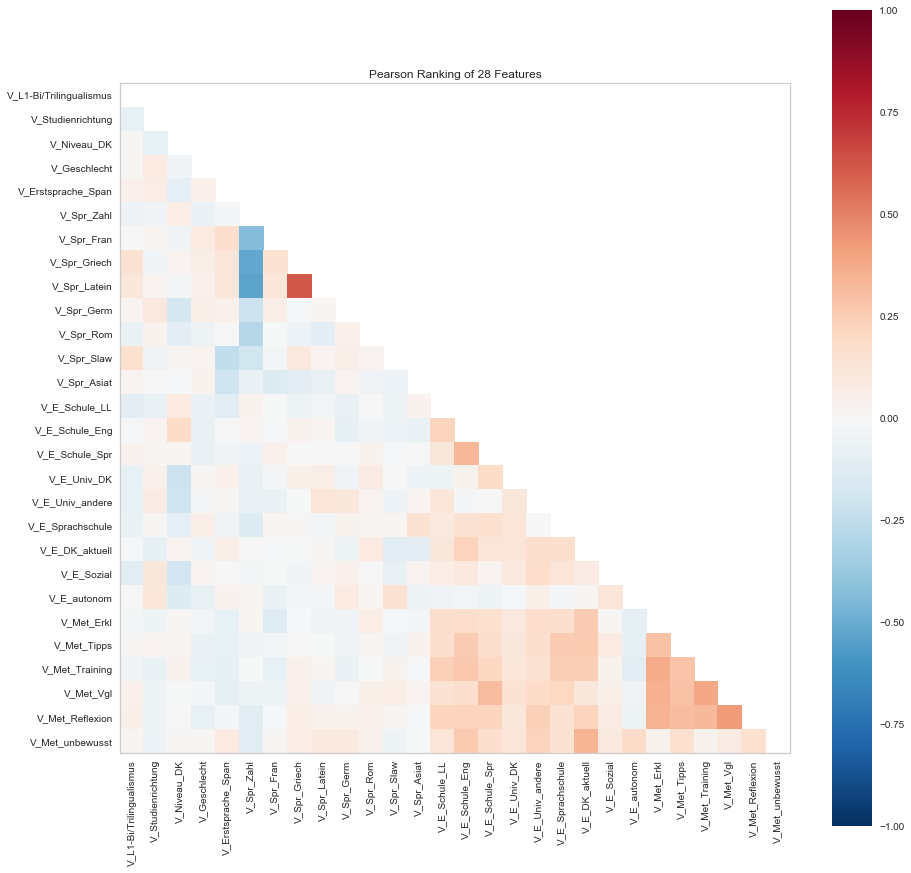

In [41]:
from yellowbrick.features import Rank2D
# Instantiate the visualizer with the Pearson ranking algorithm
plt.figure(figsize=(15,15))
visualizer = Rank2D(features=X.columns, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()      

In [31]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

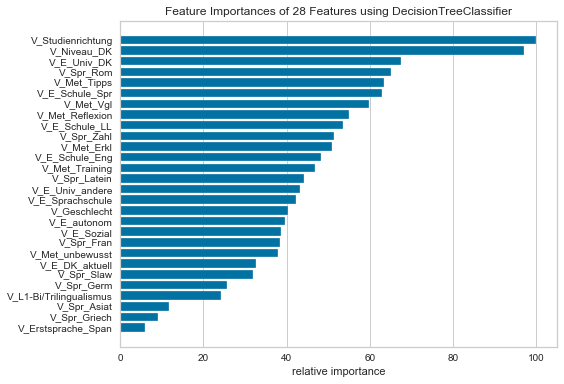

In [32]:
from yellowbrick.features.importances import FeatureImportances

# Create a new matplotlib figure
fig = plt.figure()
ax = fig.add_subplot()

viz = FeatureImportances(clf, ax=ax)
viz.fit(X, y)
viz.poof()

C:\Users\Martina\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Martina\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Martina\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Martina\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARN

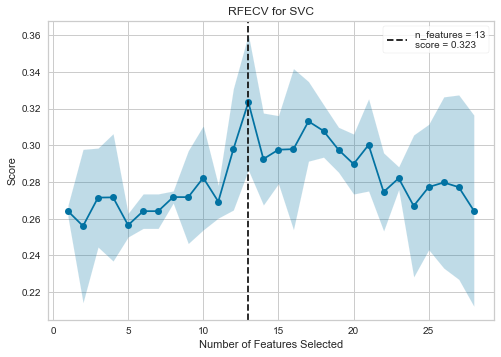

In [38]:
from sklearn.svm import SVC

from yellowbrick.features import RFECV
# Create RFECV visualizer with linear SVM classifier
viz = RFECV(SVC(kernel='linear', C=1))
viz.fit(X, y)
viz.poof()

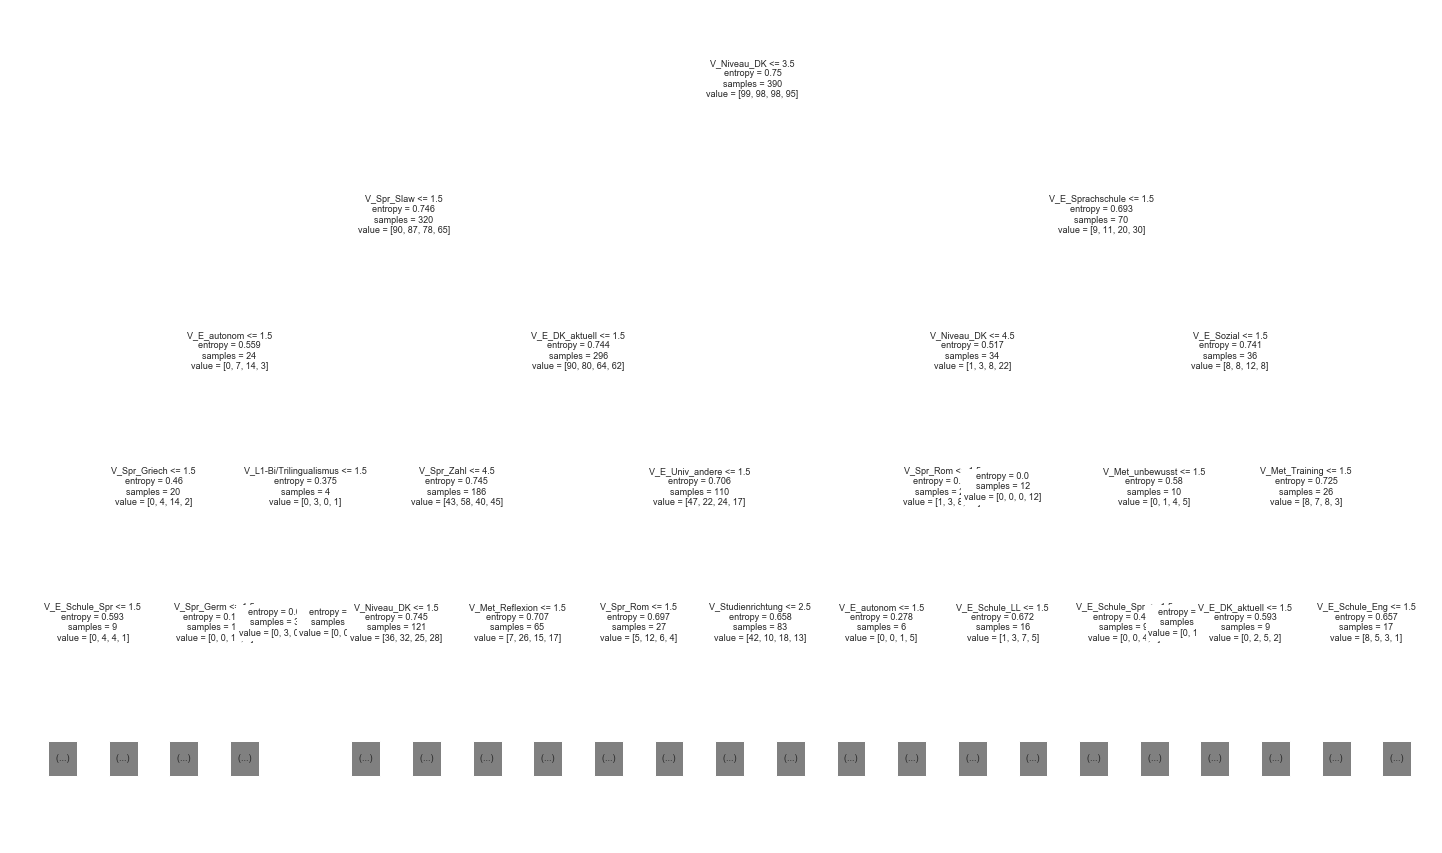

In [65]:
plt.figure(figsize = (25,15))
fig = tree.plot_tree(clf, max_depth=4, feature_names=Liste_Var, fontsize=9)
show(fig)

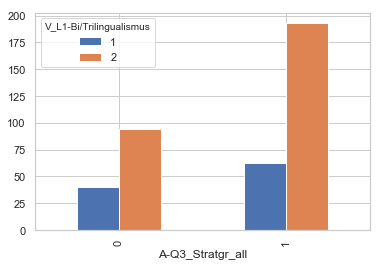

In [27]:
graf_diff2(Finished,'A-Q3_Stratgr_all','V_L1-Bi/Trilingualismus')

In [28]:
def get_CT_int(data,col,row):
    col_names = [col+'_'+str(el) for el in np.sort(data[col].unique()) ]
    row_names = [row+'_'+str(el) for el in np.sort(data[row].unique()) ]
    
    return pd.DataFrame(pd.crosstab(data[row],data[col]).values,index=row_names, columns=col_names)

In [59]:
def get_colsORrows_namesTOT(data,cols):
    COL = []
    for col in cols:
        COL= COL + [col+'_'+str(el) for el in np.sort(data[col].unique()) ]
    return COL

In [30]:
def get_matrix(data,cols,rows):
    
    COLS = get_colsORrows_namesTOT(data,cols)
    ROWS = get_colsORrows_namesTOT(data,rows)
    
    CTdf = pd.DataFrame(index=ROWS,columns=COLS)
    
    for row in rows:
        for col in cols:
            data_int = get_CT_int(data,col,row)
            CTdf.loc[data_int.index,data_int.columns] = data_int
    
    return CTdf.fillna(0)

In [31]:
testdf = get_matrix(Finished,Finished[Liste_A_Q2],Liste_Var)

In [32]:
testdf[testdf.columns[0:5]].head()

,A-Q2_1_1,A-Q2_1_2,A-Q2_1_3,A-Q2_1_4,A-Q2_1_5
V_L1-Bi/Trilingualismus_1,20,37,31,10,5
V_L1-Bi/Trilingualismus_2,56,84,96,36,15
V_Studienrichtung_0,9,9,11,1,3
V_Studienrichtung_1,23,44,43,15,5
V_Studienrichtung_2,19,28,31,14,7


In [33]:
def graf_biplot_test(data, dim, dim1 = 0, dim2 = 1, sx = 10, sy = 10):
    
    B = biplot.Classic(data, dim, method = 1) 
    R = B.RowCoord
    C = B.ColCoord
    
    fig = plt.figure(figsize=(sx,sy))
    ax = fig.add_subplot(111)
    
    for i in range(C.shape[0]):
        ax.arrow(0,0,C[i,dim1],C[i,dim2], alpha = 0.7, color = 'grey')
        #ax.scatter(C[i,dim1],C[i,dim2]) # Hier würden Linien nicht angezeigt.
        ax.text(C[i,dim1],C[i,dim2],data.columns[i],fontsize=15, alpha = 0.7)

    for i in range(R.shape[0]):
        ax.scatter(R[i,dim1],R[i,dim2], s = 20)
    
    texts = [plt.text(R[i,dim1],R[i,dim2], data.index[i], ha='center', va='center') for i in range(len(R[:,0]))];

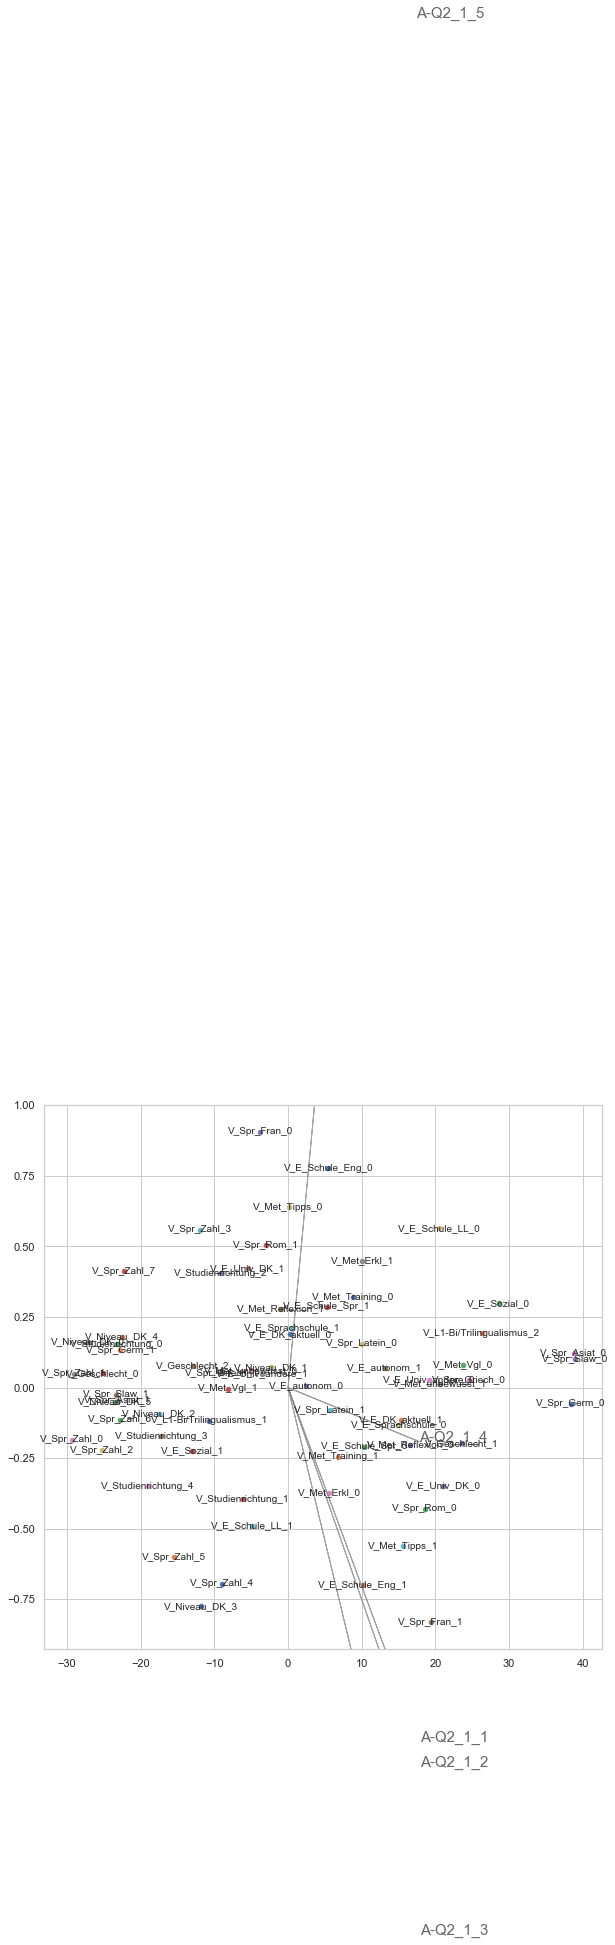

In [34]:
graf_biplot_test(testdf[testdf.columns[0:5]],5)

In [43]:
from statsmodels.multivariate.manova import MANOVA

In [44]:
y = Finished['V_Niveau_DK']
X = Df_C.loc[:]

In [45]:
manova = MANOVA(X,y)

In [245]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [246]:
lda = LDA(store_covariance=True)  
lda.fit(X, y)
y_pred = lda.predict(X)

In [277]:
lda.classes_

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [247]:
tp = (y == y_pred)

tp0, tp1, tp2, tp3,tp4, tp5 = tp[y == 0], tp[group == 1], tp[group == 2], tp[group == 3], tp[group == 4], tp[group == 5]
X0, X1, X2, X3, X4, X5 = X[y == 0], X[y == 1],X[y == 2], X[y == 3],X[y == 4], X[y == 5]
X0_tp, X0_fp = X0[tp0], X0[~tp0]
X1_tp, X1_fp = X1[tp1], X1[~tp1]
X2_tp, X2_fp = X2[tp2], X2[~tp2]
X3_tp, X3_fp = X3[tp3], X3[~tp3]
X4_tp, X4_fp = X4[tp4], X4[~tp4]
X5_tp, X5_fp = X5[tp5], X5[~tp5]

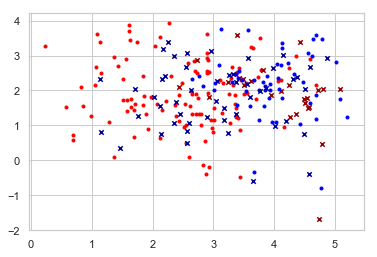

In [257]:
# class 0: dots
plt.scatter(X1_tp.iloc[:, 0], X1_tp.iloc[:, 2], marker='.', color='red')
plt.scatter(X1_fp.iloc[:, 0], X1_fp.iloc[:, 2], marker='x',
                s=20, color='#990000')  # dark red

plt.scatter(X3_tp.iloc[:, 0], X3_tp.iloc[:, 2], marker='.', color='blue')
plt.scatter(X3_fp.iloc[:, 0], X3_fp.iloc[:, 2], marker='x',
                s=20, color='#000099')  # dark blue

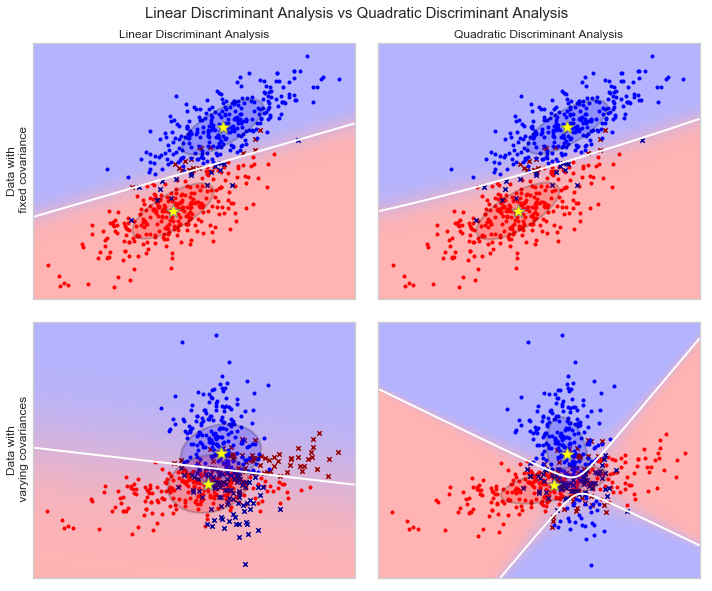

In [223]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# #############################################################################
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


# #############################################################################
# Generate datasets
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def dataset_cov():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


# #############################################################################
# Plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with\n fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with\n varying covariances')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='.', color='red')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x',
                s=20, color='#990000')  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='blue')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='x',
                s=20, color='#000099')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=0)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='black', linewidth=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], 'blue')


plt.figure(figsize=(10, 8), facecolor='white')
for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis('tight')

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plot_qda_cov(qda, splot)
    plt.axis('tight')
plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant Analysis',
             y=1.02, fontsize=15)
plt.tight_layout()
plt.show()